## CIFAR10
#### 이미지를 통해 무슨 객체인지 맞춤


In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state = 42)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

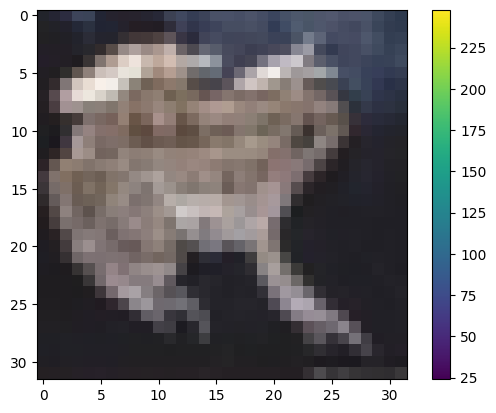

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


## 이미지 특성에 맞게 변환

In [6]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


## 정규화

In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3072, input_shape=(3072, ), name='input_15'))
model.add(layers.Dense(2048, name='dense_91'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation = 'relu', name='activation_66'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, name = 'dense_92'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation = 'relu', name='activation_67'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, name = 'dense_93'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation = 'relu', name='activation_68'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', name='dense_94'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_15 (Dense)                     │ (None, 3072)                │       9,440,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_66 (Dense)                │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_67 (Dense)                │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_68 (Dense)                │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,884,810 (91.11 MB)

 Trainable params: 23,877,642 (91.09 MB)

 Non-trainable params: 7,168 (28.00 KB)

## loss : sparse_categorical_crossentropy(다중 클래스 분류)
## optimizer : adam
## 평가 지표 : 정확도

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
from keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2282 - loss: 2.3549 - val_accuracy: 0.2433 - val_loss: 3.5709
Epoch 2/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.3393 - loss: 1.8244 - val_accuracy: 0.3455 - val_loss: 1.8585
Epoch 3/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.3891 - loss: 1.7090 - val_accuracy: 0.3280 - val_loss: 1.8949
Epoch 4/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.4123 - loss: 1.6425 - val_accuracy: 0.3316 - val_loss: 1.8650
Epoch 5/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.4405 - loss: 1.5650 - val_accuracy: 0.3830 - val_loss: 1.7878
Epoch 6/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4558 - loss: 1.5216 - val_accuracy: 0.4147 - val_loss: 1.6255
Epoch 7/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4681 - loss: 1.4909 - val_accuracy: 0.4321 - val_loss: 1.6027
Epoch 8/300
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4861 - loss: 1.4384 - val_accuracy: 0.

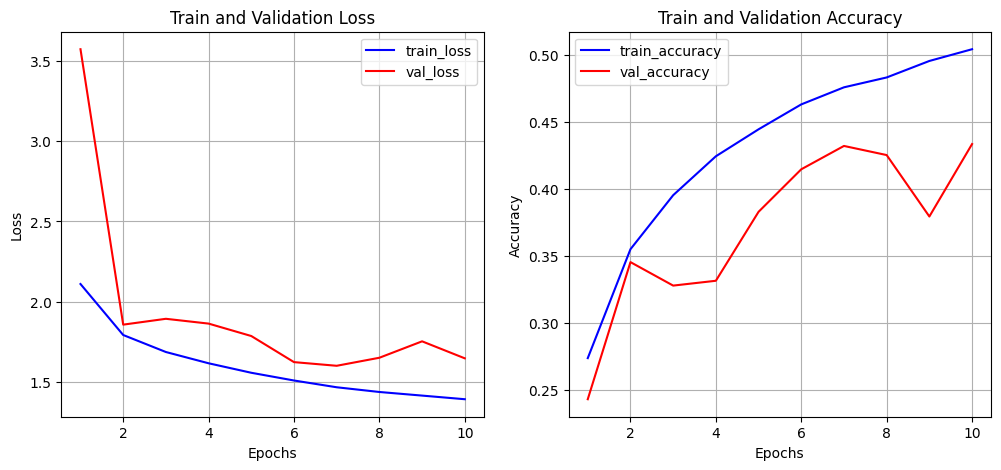

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 최종 평가 : 정확도 >> 0.43
### 처참하네요 :(

In [16]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.4283 - loss: 1.5928


[1.5971298217773438, 0.43209999799728394]